In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import os.path
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

data_path = os.path.expandvars('C:/Users/$USERNAME/Desktop/data/07_deep_learning/')

## 1: Data Generator

In [2]:
from tensorflow.keras.utils import Sequence

class GenData(Sequence):
    def __init__(self, path, split='train', batch_size=32, fraction=5):
        self.split = split
        self.path = os.path.join(path, split, 'output')
        self.batch_size = batch_size
        self.fraction = fraction
        self.num_features = 62 #our dataset has 62 features
        self.num_classes = 2 #voice activity=0/1

        # TODO: lists containing data
        self.x = [] # features: zero crossing, mfccs, ...
        self.y = [] # speech activity: 0 / 1

        # TODO: collect file names under *self.path*
        self.files = [os.path.join(self.path, f) for f in os.listdir(self.path) if f.endswith('.npz')]

        # only select a *fraction* of the file names to limit amount of 
        # training data
        self.files = self.files[1 : int(len(self.files) / self.fraction)]

        for file in tqdm(self.files):
            # TODO: load file & save contents in *self.x* & *self.y*
            data = np.load(file)
            features = data['features'].astype(np.float32)
            print("features.shape"+str(features.shape))
            vad = np.round(data['vad']).astype(np.float32)
            print("vad.shape"+str(vad.shape))
            self.x.append(features)
            self.y.append(vad)

        # Random order indices
        self.idx = np.random.permutation(range(len(self.x)))

    def __getitem__(self, item): #called with [index]
        # get random indices of current batch
        idx_batch = self.idx[item*self.batch_size : (item+1)*self.batch_size]

        # TODO: find minimum length of data for current batch
        #minlen = min(len(x) for x in x_batch)
        minlen = min([self.x[it].shape[1] for it in idx_batch])

        # TODO: get data for current batch from *self.x* / *self.y*
        #x_batch = [self.x[idx][:minlen] for idx in idx_batch]
        #y_batch = [self.y[idx][:minlen] for idx in idx_batch]
        x_tensor = np.zeros((self.batch_size, minlen, self.num_features))
        y_tensor = np.zeros((self.batch_size, minlen))
        for it, rand_it in enumerate(idx_batch):
            sequence = self.x[rand_it][:,:minlen]
            #print(sequence.shape)
            x_tensor[it, :, :] = sequence.T
            y_tensor[it, :] = self.y[rand_it][:minlen]

        # TODO: stack data for current batch to tensors of proper size
        #x_tensor = [self.x[idx][:minlen] for idx in idx_batch]
        #y_tensor = [self.y[idx][:minlen] for idx in idx_batch]

        # x_tensor = features, y_tensor = probability targets
        return x_tensor, y_tensor

    def __len__(self):
        return math.floor(len(self.x) / self.batch_size)

    def on_epoch_end(self):
        if self.split == 'train':
            # reshuffle random order indices
            self.idx = np.random.permutation(range(len(self.x)))

In [3]:
# Instantiate one generator for training, validation and test data

train_data = GenData(data_path, split='train', batch_size=32)
val_data = GenData(data_path, split='val', batch_size=32)
test_data = GenData(data_path, split='test', batch_size=32)

  2%|▏         | 96/6394 [00:00<00:06, 959.78it/s]

features.shape(62, 620)
vad.shape(620,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 338)
vad.shape(338,)


  5%|▍         | 290/6394 [00:00<00:06, 968.91it/s]


vad.shape(333,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 568)

  8%|▊         | 484/6394 [00:00<00:06, 945.58it/s]


vad.shape(274,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 777)
vad.shape(777,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 1119)
vad.shape(1119,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 250)
vad.shape(250,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 33

 11%|█         | 673/6394 [00:00<00:06, 922.29it/s]


vad.shape(427,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 790)
vad.shape(790,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 927)
vad.shape(927,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 555)
vad.shape(555,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 824)
vad.shape(824,)
features.shape(62, 756)
vad.shape(756,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 556)

 13%|█▎        | 862/6394 [00:00<00:05, 931.43it/s]


vad.shape(666,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 781)
vad.shape(781,)
features.shape(62, 650)
vad.shape(650,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 875)
vad.shape(875,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 667)
vad.shape(667,)
features.shape(62, 479)

 15%|█▌        | 960/6394 [00:01<00:05, 946.14it/s]

features.shape(62, 538)
vad.shape(538,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 452)
vad.shape(452,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 901)
vad.shape(901,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 270)
vad.shape(270,)


 18%|█▊        | 1156/6394 [00:01<00:05, 963.42it/s]


features.shape(62, 466)
vad.shape(466,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 154)
vad.shape(154,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 432)
vad.shape(432,)

 21%|██        | 1350/6394 [00:01<00:05, 962.62it/s]


vad.shape(509,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 543)
vad.shape(543,)
features.shape(62, 270)

 24%|██▍       | 1549/6394 [00:01<00:04, 975.61it/s]


features.shape(62, 492)
vad.shape(492,)
features.shape(62, 748)
vad.shape(748,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 586)
vad.shape(586,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 270)
vad.shape(270,)

 27%|██▋       | 1745/6394 [00:01<00:04, 969.89it/s]


features.shape(62, 368)
vad.shape(368,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 701)
vad.shape(701,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 363)
vad.shape(363,)

 30%|███       | 1938/6394 [00:02<00:04, 954.87it/s]


vad.shape(253,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 441)
vad.shape(441,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 355)

 33%|███▎      | 2130/6394 [00:02<00:04, 946.93it/s]


features.shape(62, 304)
vad.shape(304,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 385)
vad.shape(385,)

 35%|███▍      | 2227/6394 [00:02<00:04, 953.70it/s]


features.shape(62, 483)
vad.shape(483,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 189)
vad.shape(189,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 769)
vad.shape(769,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 338)
vad.shape(338,)

 38%|███▊      | 2418/6394 [00:02<00:04, 934.04it/s]


features.shape(62, 249)
vad.shape(249,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 539)
vad.shape(539,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 636)
vad.shape(636,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 816)
vad.shape(816,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 509)
vad.shape(509,)

 41%|████      | 2606/6394 [00:02<00:04, 910.00it/s]


vad.shape(641,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 846)
vad.shape(846,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 474)

 44%|████▎     | 2791/6394 [00:02<00:03, 915.94it/s]


vad.shape(478,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 478)
vad.shape(478,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 790)
vad.shape(790,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 461)
vad.shape(461,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 329)

 47%|████▋     | 2978/6394 [00:03<00:03, 922.26it/s]


vad.shape(248,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 313)
vad.shape(313,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 871)

 50%|████▉     | 3167/6394 [00:03<00:03, 925.36it/s]

vad.shape(382,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 560)
vad.shape(560,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 387)
vad.shape(387,)
features.shape(62, 321)


 51%|█████     | 3262/6394 [00:03<00:03, 929.85it/s]


vad.shape(415,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 205)

 54%|█████▍    | 3449/6394 [00:03<00:03, 928.03it/s]


features.shape(62, 372)
vad.shape(372,)
features.shape(62, 158)
vad.shape(158,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 897)
vad.shape(897,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 364)
vad.shape(364,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 248)
vad.shape(248,)

 57%|█████▋    | 3635/6394 [00:03<00:02, 926.99it/s]


vad.shape(248,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 146)
vad.shape(146,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 222)
vad.shape(222,)
features.shape(62, 278)

 60%|█████▉    | 3826/6394 [00:04<00:02, 941.56it/s]


features.shape(62, 176)
vad.shape(176,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 620)
vad.shape(620,)
features.shape(62, 747)
vad.shape(747,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 278)
vad.shape(278,)

 63%|██████▎   | 4025/6394 [00:04<00:02, 968.20it/s]


vad.shape(381,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 282)

 66%|██████▌   | 4219/6394 [00:04<00:02, 946.31it/s]


vad.shape(261,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 726)
vad.shape(726,)
features.shape(62, 142)
vad.shape(142,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 133)
vad.shape(133,)
features.shape(62, 420)
vad.shape(420,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 321)

 69%|██████▉   | 4413/6394 [00:04<00:02, 959.92it/s]


vad.shape(346,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 188)

 71%|███████   | 4510/6394 [00:04<00:01, 960.00it/s]


vad.shape(146,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 426)
vad.shape(426,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 397)
vad.shape(397,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 175)
vad.shape(175,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 265)

 74%|███████▎  | 4703/6394 [00:04<00:01, 944.78it/s]


vad.shape(376,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 363)

 77%|███████▋  | 4893/6394 [00:05<00:01, 937.85it/s]


features.shape(62, 534)
vad.shape(534,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 598)
vad.shape(598,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 517)
vad.shape(517,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 935)
vad.shape(935,)

 80%|███████▉  | 5087/6394 [00:05<00:01, 953.96it/s]


vad.shape(385,)
features.shape(62, 159)
vad.shape(159,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 163)
vad.shape(163,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 218)

 83%|████████▎ | 5282/6394 [00:05<00:01, 957.86it/s]


features.shape(62, 278)
vad.shape(278,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 192)
vad.shape(192,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 287)
vad.shape(287,)

 86%|████████▌ | 5474/6394 [00:05<00:00, 951.18it/s]


vad.shape(325,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 202)
vad.shape(202,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 700)
vad.shape(700,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 227)

 87%|████████▋ | 5570/6394 [00:05<00:00, 953.74it/s]


features.shape(62, 351)
vad.shape(351,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 803)
vad.shape(803,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 325)
vad.shape(325,)

 90%|█████████ | 5760/6394 [00:06<00:00, 905.18it/s]


vad.shape(283,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 261)

 93%|█████████▎| 5942/6394 [00:06<00:00, 900.37it/s]


vad.shape(240,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 508)
vad.shape(508,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 692)
vad.shape(692,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 961)
vad.shape(961,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 948)
vad.shape(948,)
features.shape(62, 675)
vad.shape(675,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 287)

 96%|█████████▌| 6123/6394 [00:06<00:00, 893.19it/s]


vad.shape(317,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 303)
vad.shape(303,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 479)
vad.shape(479,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 185)
vad.shape(185,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 602)
vad.shape(602,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 837)
vad.shape(837,)
features.shape(62, 308)

 99%|█████████▊| 6308/6394 [00:06<00:00, 910.42it/s]


features.shape(62, 606)
vad.shape(606,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 462)
vad.shape(462,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 432)
vad.shape(432,)
features.shape(62, 380)
vad.shape(380,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 334)
vad.shape(334,)

  0%|          | 0/1221 [00:00<?, ?it/s]


features.shape(62, 289)
vad.shape(289,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 619)
vad.shape(619,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 321)
vad.shape(321,)

  7%|▋         | 91/1221 [00:00<00:02, 448.94it/s]


vad.shape(355,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 483)
vad.shape(483,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 551)

 15%|█▌        | 184/1221 [00:00<00:02, 457.02it/s]


vad.shape(393,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 986)

 23%|██▎       | 275/1221 [00:00<00:02, 441.55it/s]


features.shape(62, 291)
vad.shape(291,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 394)
vad.shape(394,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 526)
vad.shape(526,)
features.shape(62, 325)
vad.shape(325,)

 30%|██▉       | 364/1221 [00:00<00:01, 431.02it/s]


vad.shape(534,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 299)
vad.shape(299,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 590)
vad.shape(590,)
features.shape(62, 556)
vad.shape(556,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 474)
vad.shape(474,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 628)
vad.shape(628,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 999)
vad.shape(999,)
features.shape(62, 338)

 33%|███▎      | 408/1221 [00:00<00:01, 417.67it/s]


vad.shape(338,)
features.shape(62, 615)
vad.shape(615,)
features.shape(62, 496)
vad.shape(496,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 1170)
vad.shape(1170,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 525)
vad.shape(525,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 34

 40%|████      | 492/1221 [00:01<00:01, 415.94it/s]


vad.shape(1153,)
features.shape(62, 961)
vad.shape(961,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 649)
vad.shape(649,)
features.shape(62, 709)
vad.shape(709,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 722)
vad.shape(722,)
features.shape(62, 350)
vad.shape(350,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 475)
vad.shape(475,)
features.shape(62, 521)
vad.shape(521,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 538)
vad.shape(538,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 458)
vad.shape(458,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 457

 47%|████▋     | 575/1221 [00:01<00:01, 401.12it/s]


features.shape(62, 312)
vad.shape(312,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 654)
vad.shape(654,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 829)
vad.shape(829,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 624)
vad.shape(624,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 688)
vad.shape(688,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 542)
vad.shape(542,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 829)
vad.shape(829,)
features.shape(62, 444)
vad.shape(444,)

 54%|█████▍    | 661/1221 [00:01<00:01, 411.50it/s]


vad.shape(508,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 837)
vad.shape(837,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 671)
vad.shape(671,)
features.shape(62, 633)
vad.shape(633,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 462)

 61%|██████▏   | 749/1221 [00:01<00:01, 427.22it/s]


vad.shape(586,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 632)
vad.shape(632,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 338)
vad.shape(338,)
features.shape(62, 811)
vad.shape(811,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 594)
vad.shape(594,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 581)
vad.shape(581,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 658)
vad.shape(658,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 278)

 69%|██████▉   | 840/1221 [00:01<00:00, 438.41it/s]

features.shape(62, 227)
vad.shape(227,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 184)
vad.shape(184,)
features.shape(62, 347)
vad.shape(347,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 180)
vad.shape(180,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 193)
vad.shape(193,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 265)
vad.shape(265,)


 73%|███████▎  | 886/1221 [00:02<00:00, 442.79it/s]


vad.shape(253,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 585)
vad.shape(585,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 398)
vad.shape(398,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)

 80%|███████▉  | 976/1221 [00:02<00:00, 433.34it/s]


vad.shape(282,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 252)
vad.shape(252,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 266)
vad.shape(266,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 223)
vad.shape(223,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 645)
vad.shape(645,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 765)

 87%|████████▋ | 1067/1221 [00:02<00:00, 435.96it/s]


vad.shape(214,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 219)
vad.shape(219,)
features.shape(62, 257)
vad.shape(257,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 236)
vad.shape(236,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 270)
vad.shape(270,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 270)

 95%|█████████▍| 1155/1221 [00:02<00:00, 431.69it/s]


vad.shape(334,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 167)
vad.shape(167,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 176)
vad.shape(176,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 201)
vad.shape(201,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 265)

  0%|          | 0/1229 [00:00<?, ?it/s]


vad.shape(350,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 287)
vad.shape(287,)
features.shape(62, 731)
vad.shape(731,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 445)
vad.shape(445,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 491)
vad.shape(491,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 509)
vad.shape(509,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 807)
vad.shape(807,)
features.shape(62, 397)

 14%|█▎        | 167/1229 [00:00<00:01, 832.56it/s]


vad.shape(304,)
features.shape(62, 607)
vad.shape(607,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 547)
vad.shape(547,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 286)
vad.shape(286,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 444)
vad.shape(444,)
features.shape(62, 534)
vad.shape(534,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 188)
vad.shape(188,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 513)
vad.shape(513,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 551)
vad.shape(551,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 359)

 27%|██▋       | 334/1229 [00:00<00:01, 817.06it/s]


vad.shape(440,)
features.shape(62, 589)
vad.shape(589,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 862)
vad.shape(862,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 351)
vad.shape(351,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 406)
vad.shape(406,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 329)
vad.shape(329,)
features.shape(62, 487)
vad.shape(487,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 1102)
vad.shape(1102,)
features.shape(62, 564)
vad.shape(564,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 43

 41%|████      | 500/1229 [00:00<00:00, 825.37it/s]


vad.shape(355,)
features.shape(62, 283)
vad.shape(283,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 909)
vad.shape(909,)
features.shape(62, 880)
vad.shape(880,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 410)
vad.shape(410,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 449)
vad.shape(449,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 577)
vad.shape(577,)
features.shape(62, 457)
vad.shape(457,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 385)
vad.shape(385,)
features.shape(62, 253)
vad.shape(253,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 470)
vad.shape(470,)
features.shape(62, 312)
vad.shape(312,)
features.shape(62, 244)
vad.shape(244,)
features.shape(62, 504)
vad.shape(504,)
features.shape(62, 346)

 47%|████▋     | 583/1229 [00:00<00:00, 818.83it/s]

features.shape(62, 274)
vad.shape(274,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 330)
vad.shape(330,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 265)
vad.shape(265,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 355)
vad.shape(355,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 317)
vad.shape(317,)


 61%|██████▏   | 753/1229 [00:00<00:00, 834.24it/s]

features.shape(62, 381)
vad.shape(381,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 666)
vad.shape(666,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 363)
vad.shape(363,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 205)
vad.shape(205,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 466)
vad.shape(466,)
features.shape(62, 291)
vad.shape(291,)
features.shape(62, 393)
vad.shape(393,)
features.shape(62, 235)
vad.shape(235,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 206)
vad.shape(206,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 269)
vad.shape(269,)
features.shape(62, 231)
vad.shape(231,)
features.shape(62, 530)
vad.shape(530,)
features.shape(62, 568)
vad.shape(568,)
features.shape(62, 342)
vad.shape(342,)
features.shape(62, 381)
vad.shape(381,)


 75%|███████▌  | 922/1229 [00:01<00:00, 831.66it/s]


vad.shape(206,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 368)
vad.shape(368,)
features.shape(62, 210)
vad.shape(210,)
features.shape(62, 372)
vad.shape(372,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 683)
vad.shape(683,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 427)
vad.shape(427,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 295)
vad.shape(295,)
features.shape(62, 402)
vad.shape(402,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 453)
vad.shape(453,)
features.shape(62, 274)
vad.shape(274,)
features.shape(62, 492)
vad.shape(492,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 359)
vad.shape(359,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 235)

 89%|████████▊ | 1089/1229 [00:01<00:00, 819.25it/s]


features.shape(62, 368)
vad.shape(368,)
features.shape(62, 411)
vad.shape(411,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 316)
vad.shape(316,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 304)
vad.shape(304,)
features.shape(62, 376)
vad.shape(376,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 440)
vad.shape(440,)
features.shape(62, 248)
vad.shape(248,)
features.shape(62, 227)
vad.shape(227,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 317)
vad.shape(317,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 171)
vad.shape(171,)
features.shape(62, 415)
vad.shape(415,)
features.shape(62, 240)
vad.shape(240,)
features.shape(62, 423)
vad.shape(423,)
features.shape(62, 414)
vad.shape(414,)
features.shape(62, 428)
vad.shape(428,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 419)
vad.shape(419,)

100%|██████████| 1229/1229 [00:01<00:00, 820.24it/s]


vad.shape(283,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 321)
vad.shape(321,)
features.shape(62, 218)
vad.shape(218,)
features.shape(62, 441)
vad.shape(441,)
features.shape(62, 500)
vad.shape(500,)
features.shape(62, 334)
vad.shape(334,)
features.shape(62, 419)
vad.shape(419,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 325)
vad.shape(325,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 381)
vad.shape(381,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 239)
vad.shape(239,)
features.shape(62, 436)
vad.shape(436,)
features.shape(62, 282)
vad.shape(282,)
features.shape(62, 333)
vad.shape(333,)
features.shape(62, 300)
vad.shape(300,)
features.shape(62, 308)
vad.shape(308,)
features.shape(62, 197)
vad.shape(197,)
features.shape(62, 214)
vad.shape(214,)
features.shape(62, 346)
vad.shape(346,)
features.shape(62, 278)
vad.shape(278,)
features.shape(62, 389)
vad.shape(389,)
features.shape(62, 261)
vad.shape(261,)
features.shape(62, 389)

x_train_0.shape:  (32, 184, 62)
y_train_0.shape:  (32, 184)
train_data len:  199


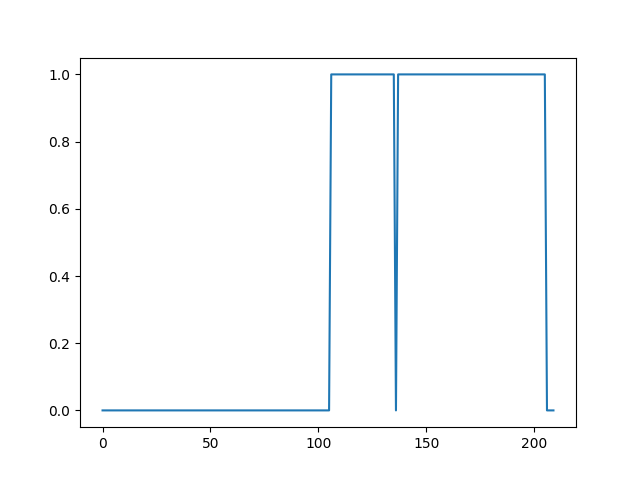

In [30]:
# draw one batch from the training generator
x_train_0, y_train_0 = train_data[1]
print("x_train_0.shape: ",x_train_0.shape)
print("y_train_0.shape: ",y_train_0.shape)

# check length of training generator
print("train_data len: ",len(train_data))

# check if we can iterate whole generator
for x, y in train_data:
    pass

# plot targets for 1st sentence of a batch
plt.figure()
plt.plot(y[0,:])

## 2: Feedforward Network

In [46]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, Activation, Input

from tensorflow.keras.losses import BinaryCrossentropy # TODO: which loss should be used?

def build_feedforward_model(num_neurons=128, num_blocks=2, dropout_rate=0.15, learning_rate=1E-4):

    model = Sequential()
    model.add(Input(shape=(None,62)))
    model.add(BatchNormalization())

    for _ in range(num_blocks):
        model.add(Dense(num_neurons))
        model.add(ReLU())
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    
    # Output layer
    model.add(Dense(1))  #Output size=1, common practice for binary classification
    model.add(Activation('sigmoid'))  # Sigmoid is common practice for binary classification

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=BinaryCrossentropy(),
        metrics=[BinaryAccuracy()]
    )

    return model

In [47]:
# test for 1 epochs ...
model_ff = build_feedforward_model()
history_ff = model_ff.fit(train_data, validation_data=val_data, epochs=1)

199/199 [==============================] - 3s 12ms/step - loss: 0.6986 - binary_accuracy: 0.6285 - val_loss: 0.5680 - val_binary_accuracy: 0.7312


## 3. Evaluation Function

In [83]:
def evaluate(model, test_data):
    # Evaluate the model on test data
    loss_test, accuracy_test = model.evaluate(test_data)
    print(f"Test Loss: {loss_test}")
    print(f"Test Accuracy: {accuracy_test}")
    
    # Print the number of model parameters
    num_params = model.count_params()
    print(f"Number of model parameters: {num_params}")
    
    # Select a sample from the test data
    x_test_0, y_test_0 = test_data[1]
    post_test = model.predict(x_test_0)
    post_test_2 = post_test.reshape(post_test.shape[0],post_test.shape[1])
    print("y_test_0 shape: ", y_test_0.shape)
    print("post_test shape: ", post_test_2.shape)
    
    # Plot the true targets and predictions
    samplenum = np.random.randint(y_test_0.shape[0])
    plt.figure()
    plt.plot(y_test_0[samplenum], 'b', label='Sample True Probabilities', alpha=1)
    plt.plot(post_test_2[samplenum], 'r', label='Prediction', alpha=1)
    plt.plot(np.round(post_test_2[samplenum]), 'g--', label='Prediction rounded', alpha=1)
    plt.title('True Target vs Prediction')
    plt.xlabel('Sample Index')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

38/38 [==============================] - 0s 8ms/step - loss: 0.3904 - binary_accuracy: 0.8466
Test Loss: 0.3903612494468689
Test Accuracy: 0.8466154336929321
Number of model parameters: 25977
y_test_0 shape:  (32, 214)
post_test shape:  (32, 214)


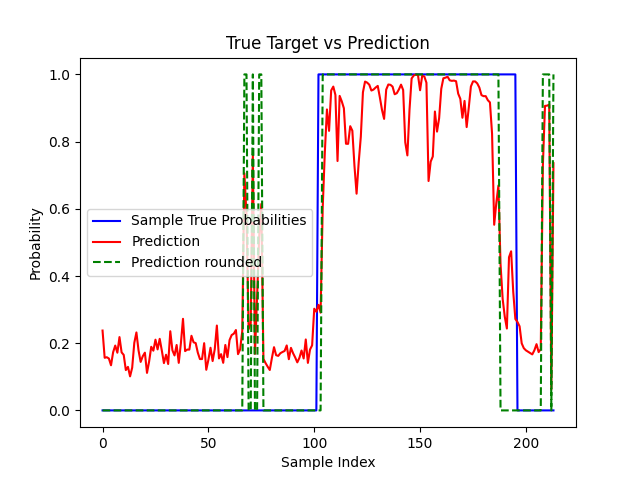

In [84]:
evaluate(model_ff, test_data)

## 4. First Real Training

Epoch 1/14
199/199 [==============================] - 3s 12ms/step - loss: 0.6124 - binary_accuracy: 0.6796 - val_loss: 0.5603 - val_binary_accuracy: 0.7207
Epoch 2/14
199/199 [==============================] - 2s 11ms/step - loss: 0.4781 - binary_accuracy: 0.7950 - val_loss: 0.4867 - val_binary_accuracy: 0.7731
Epoch 3/14
199/199 [==============================] - 2s 12ms/step - loss: 0.4557 - binary_accuracy: 0.8074 - val_loss: 0.4537 - val_binary_accuracy: 0.7998
Epoch 4/14
199/199 [==============================] - 2s 11ms/step - loss: 0.4435 - binary_accuracy: 0.8127 - val_loss: 0.4415 - val_binary_accuracy: 0.8101
Epoch 5/14
199/199 [==============================] - 2s 11ms/step - loss: 0.4375 - binary_accuracy: 0.8141 - val_loss: 0.4315 - val_binary_accuracy: 0.8147
Epoch 6/14
199/199 [==============================] - 2s 11ms/step - loss: 0.4288 - binary_accuracy: 0.8184 - val_loss: 0.4296 - val_binary_accuracy: 0.8184
Epoch 7/14
199/199 [==============================] - 2s 1

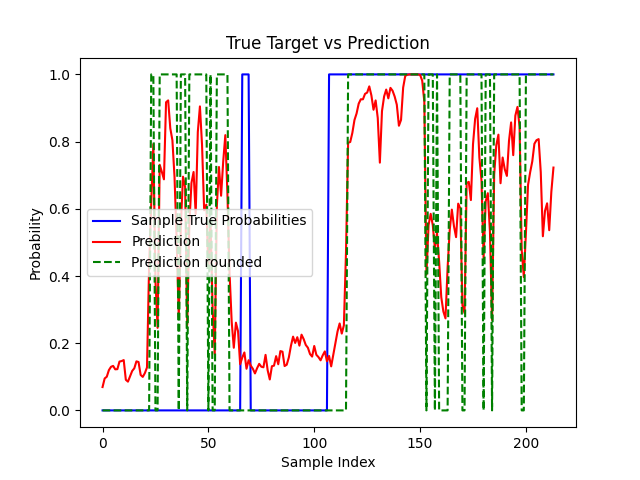

In [94]:
# ... and with 15 more epochs
model_ff = build_feedforward_model()
history_ff = model_ff.fit(train_data, validation_data=val_data, epochs=14)
evaluate(model_ff, test_data)

38/38 [==============================] - 0s 10ms/step - loss: 0.3902 - binary_accuracy: 0.8471
Test Loss: 0.3902156949043274
Test Accuracy: 0.8471103310585022
Number of model parameters: 25977
y_test_0 shape:  (32, 214)
post_test shape:  (32, 214)


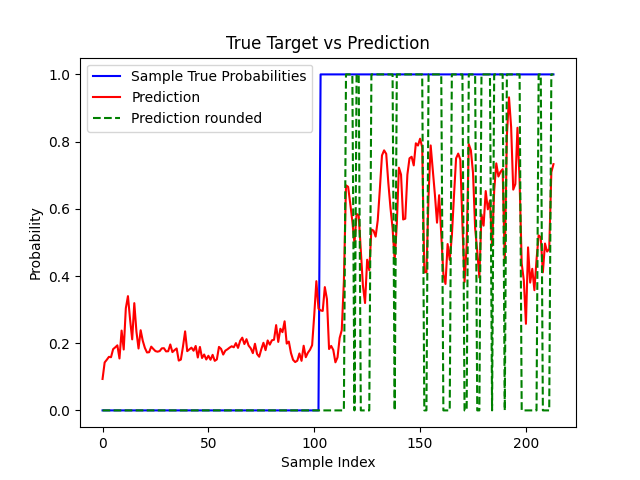

In [101]:
evaluate(model_ff, test_data)

## 5: A Recurrent Model

In [71]:
from tensorflow.keras.layers import LSTM

def build_lstm_model(num_neurons=32, num_blocks=2, learning_rate=1E-4):

    model = Sequential()
    model.add(Input(shape=(None,62)))
    model.add(BatchNormalization())

    for _ in range(num_blocks):
        model.add(LSTM(num_neurons, return_sequences=True))
        model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(1))  #Output size=1, common practice for binary classification
    model.add(Activation('sigmoid'))  # Sigmoid is common practice for binary classification

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss=BinaryCrossentropy(),
        metrics=[BinaryAccuracy()]
    )

    return model

38/38 [==============================] - 1s 17ms/step - loss: 0.5930 - binary_accuracy: 0.7780
Test Loss: 0.5929587483406067
Test Accuracy: 0.7780072689056396
Number of model parameters: 21017
y_test_0 shape:  (32, 214)
post_test shape:  (32, 214)


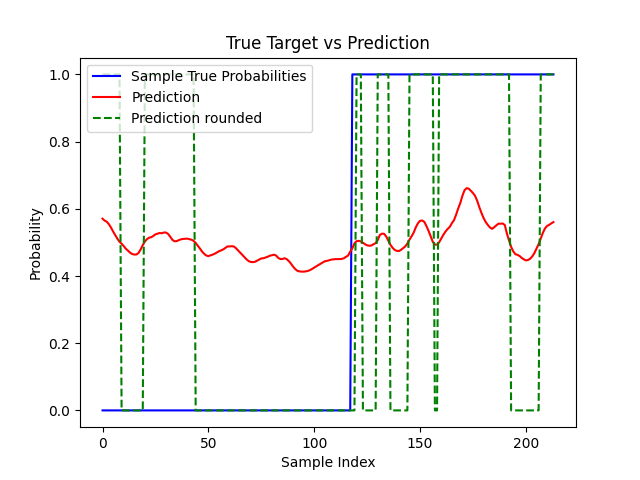

In [86]:
# test with 1 epoch ...
model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(train_data, validation_data=val_data, epochs=1)
evaluate(model_lstm, test_data)

Epoch 1/15
199/199 [==============================] - 9s 31ms/step - loss: 0.7073 - binary_accuracy: 0.6268 - val_loss: 0.6111 - val_binary_accuracy: 0.6499
Epoch 2/15
199/199 [==============================] - 5s 28ms/step - loss: 0.4146 - binary_accuracy: 0.8256 - val_loss: 0.4926 - val_binary_accuracy: 0.7772
Epoch 3/15
199/199 [==============================] - 6s 28ms/step - loss: 0.3482 - binary_accuracy: 0.8635 - val_loss: 0.3963 - val_binary_accuracy: 0.8450
Epoch 4/15
199/199 [==============================] - 6s 28ms/step - loss: 0.2998 - binary_accuracy: 0.8843 - val_loss: 0.3502 - val_binary_accuracy: 0.8582
Epoch 5/15
199/199 [==============================] - 6s 28ms/step - loss: 0.2674 - binary_accuracy: 0.8993 - val_loss: 0.3362 - val_binary_accuracy: 0.8611
Epoch 6/15
199/199 [==============================] - 6s 28ms/step - loss: 0.2441 - binary_accuracy: 0.9113 - val_loss: 0.2850 - val_binary_accuracy: 0.8900
Epoch 7/15
199/199 [==============================] - 6s 2

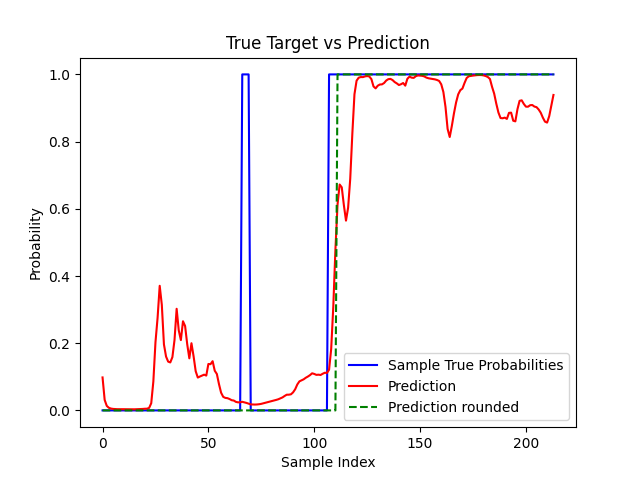

In [87]:
# ... and with 15
model_lstm = build_lstm_model()
history_lstm = model_lstm.fit(train_data, validation_data=val_data, epochs=15)
evaluate(model_lstm, test_data)

38/38 [==============================] - 1s 20ms/step - loss: 0.2216 - binary_accuracy: 0.9224
Test Loss: 0.22156542539596558
Test Accuracy: 0.9223709106445312
Number of model parameters: 21017
y_test_0 shape:  (32, 214)
post_test shape:  (32, 214)


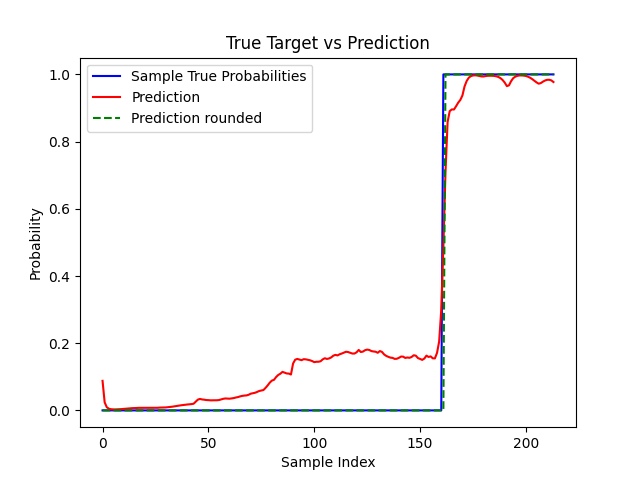

In [90]:
evaluate(model_lstm, test_data)

## 6: Different Learning Rates

In [92]:
learning_rates = [1E-4, 1E-3, 1E-2]
histories = []

# TODO: build and train models for different learning rates
for lr in learning_rates:
    model = build_lstm_model(learning_rate=lr)
    history = model.fit(train_data, validation_data=val_data, epochs=3)
    histories.append(history)

Epoch 1/3
199/199 [==============================] - 9s 31ms/step - loss: 0.7544 - binary_accuracy: 0.6230 - val_loss: 0.5923 - val_binary_accuracy: 0.7799
Epoch 2/3
199/199 [==============================] - 6s 28ms/step - loss: 0.4178 - binary_accuracy: 0.8248 - val_loss: 0.5314 - val_binary_accuracy: 0.7540
Epoch 3/3
199/199 [==============================] - 6s 28ms/step - loss: 0.3570 - binary_accuracy: 0.8589 - val_loss: 0.4838 - val_binary_accuracy: 0.7658
Epoch 1/3
199/199 [==============================] - 9s 32ms/step - loss: 0.4212 - binary_accuracy: 0.8071 - val_loss: 1.0230 - val_binary_accuracy: 0.5580
Epoch 2/3
199/199 [==============================] - 6s 28ms/step - loss: 0.2333 - binary_accuracy: 0.9174 - val_loss: 0.2786 - val_binary_accuracy: 0.9136
Epoch 3/3
199/199 [==============================] - 6s 28ms/step - loss: 0.1792 - binary_accuracy: 0.9392 - val_loss: 0.1821 - val_binary_accuracy: 0.9363
Epoch 1/3
199/199 [==============================] - 9s 32ms/ste

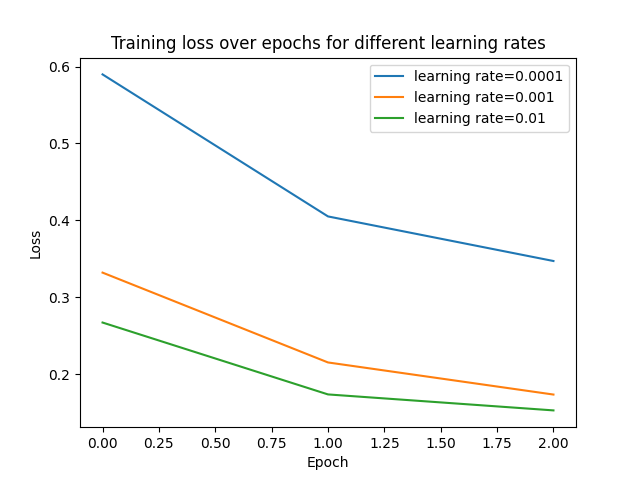

In [93]:
# TODO: compare loss over epoch for different learning rates
plt.figure()
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['loss'], label=f'learning rate={lr}')

plt.title('Training loss over epochs for different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()